In [33]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
merged_optimized_data = pandas.read_csv("../processed_datasets/log_data_optimized_merged.csv")
merged_optimized_data.head()

,Unnamed: 0,t,planSummary,planningTimeMicros,cursorExhausted,queryFramework,reslen,cpuNanos,filter,$eq,...,selector,standard_logical,all_operators,null_operand,regex_null_operand,text,label,query_length_raw,keywords_only,query_length_keywords_only
0,0,1.712243e+09,EOF,83.0,True,classic,118,176371,"{'user': '{}', 'password': '{}'}",0,...,1,1,1,1,1,"{""user"": ""{}"", ""password"": ""{}""}",0,32,"{: {}, : {}}",12
1,1,1.712243e+09,EOF,83.0,True,classic,118,176371,"{'user': '{}', 'password': '{}'}",0,...,1,1,1,1,1,"{""user"": ""{}"", ""password"": ""{}""}",0,32,"{: {}, : {}}",12
2,2,1.712243e+09,EOF,71.0,True,classic,118,112781,{'username': {'$regex': '^{}'}},0,...,1,1,1,1,1,"{""username"": {""$regex"": ""^{}""}}",1,31,{: {$regex: ^{}}},17
3,3,1.712243e+09,EOF,71.0,True,classic,118,112781,{'username': {'$regex': '^{}'}},0,...,1,1,1,1,1,"{""username"": {""$regex"": ""^{}""}}",1,31,{: {$regex: ^{}}},17
4,4,1.712243e+09,EOF,42.0,True,classic,118,71093,{'username': {'$ne': '{}'}},0,...,1,1,1,1,1,"{""username"": {""$ne"": ""{}""}}",1,27,{: {$ne: {}}},13


In [14]:
sample_1 = merged_optimized_data[merged_optimized_data['label'] == 1]
sample_0 = merged_optimized_data[merged_optimized_data['label'] == 0]

/tmp/ipykernel_8537/2720266853.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(sample_0['reslen'], ax=axs[1, 0], label='0', linewidth=2)
/tmp/ipykernel_8537/2720266853.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(sample_1['reslen'], ax=axs[1, 0], label='1', linewidth=2)
/tmp/ipykernel_8537/2720266853.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend(loc='upper right')


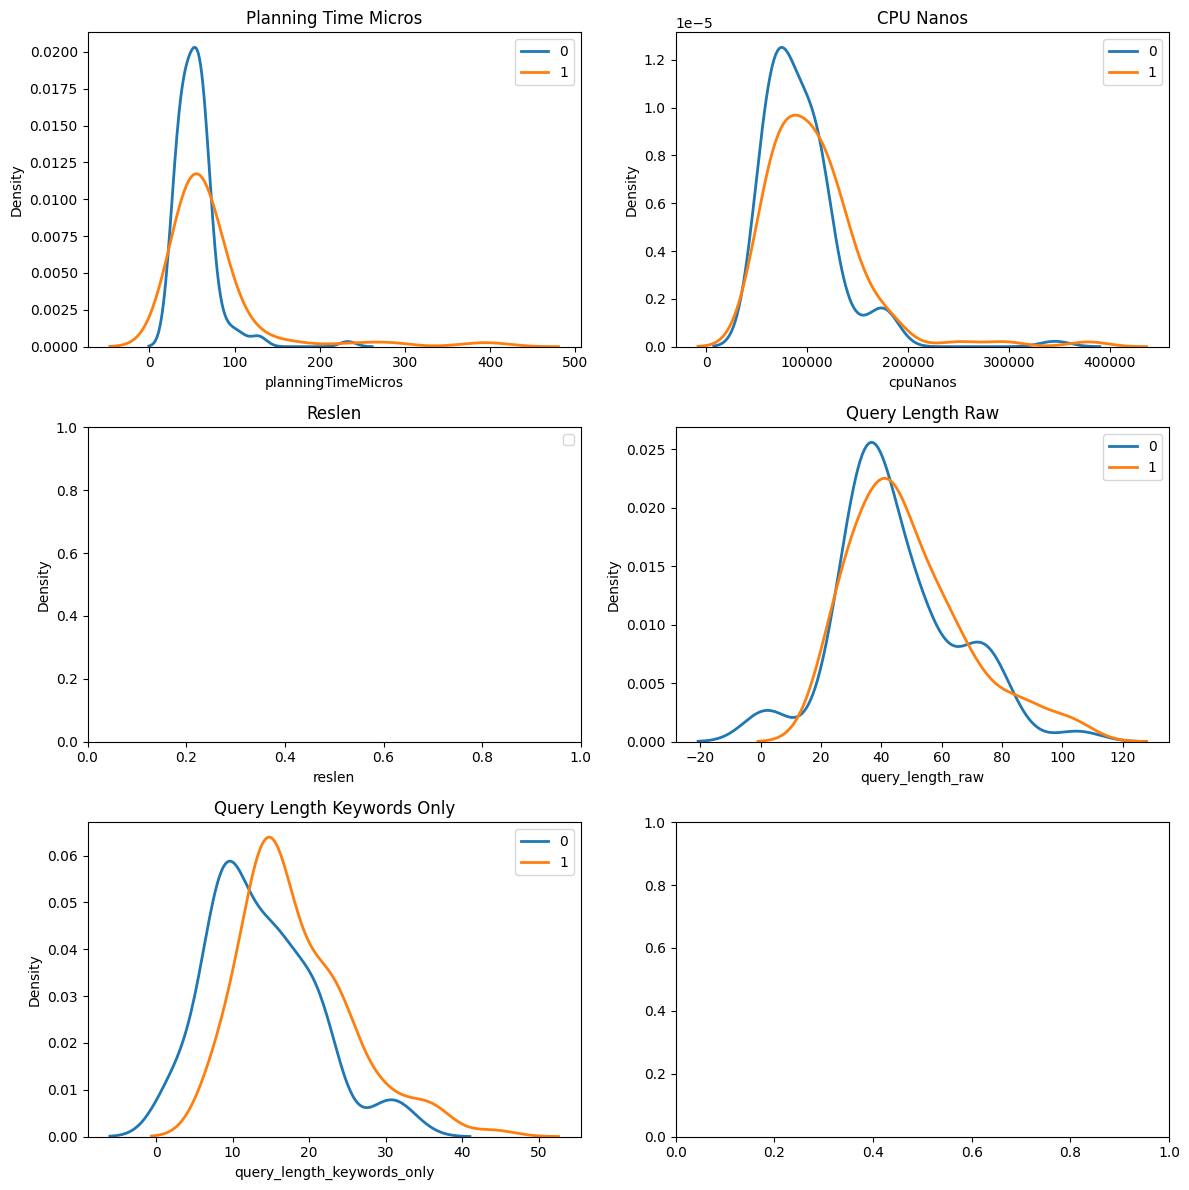

In [35]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# planningTimeMicros
sns.kdeplot(sample_0['planningTimeMicros'], ax=axs[0, 0], label='0', linewidth=2)
sns.kdeplot(sample_1['planningTimeMicros'], ax=axs[0, 0], label='1', linewidth=2)
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_title('Planning Time Micros')

# cpuNanos
sns.kdeplot(sample_0['cpuNanos'], ax=axs[0, 1], label='0', linewidth=2)
sns.kdeplot(sample_1['cpuNanos'], ax=axs[0, 1], label='1', linewidth=2)
axs[0, 1].legend(loc='upper right')
axs[0, 1].set_title('CPU Nanos')

# reslen
sns.kdeplot(sample_0['reslen'], ax=axs[1, 0], label='0', linewidth=2)
sns.kdeplot(sample_1['reslen'], ax=axs[1, 0], label='1', linewidth=2)
axs[1, 0].legend(loc='upper right')
axs[1, 0].set_title('Reslen')

# query_length_raw
sns.kdeplot(sample_0['query_length_raw'], ax=axs[1, 1], label='0', linewidth=2)
sns.kdeplot(sample_1['query_length_raw'], ax=axs[1, 1], label='1', linewidth=2)
axs[1, 1].legend(loc='upper right')
axs[1, 1].set_title('Query Length Raw')

# query_length_keywords_only
sns.kdeplot(sample_0['query_length_keywords_only'], ax=axs[2, 0], label='0', linewidth=2)
sns.kdeplot(sample_1['query_length_keywords_only'], ax=axs[2, 0], label='1', linewidth=2)
axs[2, 0].legend(loc='upper right')
axs[2, 0].set_title('Query Length Keywords Only')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

In [23]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test on data
stat_PTM, p_value_PTM = mannwhitneyu(sample_0['planningTimeMicros'], sample_1['planningTimeMicros'])
stat_CPU, p_value_CPU = mannwhitneyu(sample_0['cpuNanos'], sample_1['cpuNanos'])
stat_RL, p_value_RL = mannwhitneyu(sample_0['reslen'], sample_1['reslen'])
stat_QL, p_value_QL = mannwhitneyu(sample_0['query_length_raw'], sample_1['query_length_raw'])
stat_QLK, p_value_QLK = mannwhitneyu(sample_0['query_length_keywords_only'], sample_1['query_length_keywords_only'])

# Store results in a pandas dataframe
results = pandas.DataFrame({
    'metric': ['planningTimeMicros', 'cpuNanos', 'reslen', 'query_length_raw', 'query_length_keywords_only'],
    'statistic': [stat_PTM, stat_CPU, stat_RL, stat_QL, stat_QLK],
    'p_value': [p_value_PTM, p_value_CPU, p_value_RL, p_value_QL, p_value_QLK],
    'significant_0.1': [p_value_PTM < 0.1, p_value_CPU < 0.1, p_value_RL < 0.1, p_value_QL < 0.1, p_value_QLK < 0.1],
    'significant_0.05': [p_value_PTM < 0.05, p_value_CPU < 0.05, p_value_RL < 0.05, p_value_QL < 0.05, p_value_QLK < 0.05],
    'significant_0.01': [p_value_PTM < 0.01, p_value_CPU < 0.01, p_value_RL < 0.01, p_value_QL < 0.01, p_value_QLK < 0.01]
})

# Print the results
print("Mann-Whitney U test:")
results

Mann-Whitney U test:


,metric,statistic,p_value,significant_0.1,significant_0.05,significant_0.01
0,planningTimeMicros,4926.5,0.006628,True,True,True
1,cpuNanos,5013.0,0.011228,True,True,False
2,reslen,6240.0,1.000000,False,False,False
3,query_length_raw,5589.0,0.178336,False,False,False
4,query_length_keywords_only,3997.0,0.000003,True,True,True
